### Identifying sets of metrics

We have some sets of metrics "pre-packaged" if you will, to look at what seems to be the interesting to compare summary stats between different runs, for some science goals. 
This notebook gives some examples of finding new sets of metrics to add to those packages, for comparing between runs. 

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colorcet
from IPython.display import display
import rubin_sim.maf as maf

In [3]:
# Download the information on the families - this helps us load up related sets of simulations,
# while progressing in expected impact through survey simulation variations within each family.
# 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/runs_v2.1.json'
source = 'runs_v2.1.json'
families = maf.archive.get_family_descriptions(source)
family_list = families.index.values

In [4]:
# Download the summary csv file -- note that metric names may change between major updates in the CSV file
# 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/summary_2022_04_28.csv'
summary_source = 'summary_2022_04_28.csv'
summaries = maf.get_metric_summaries(summary_source=summary_source)

In [5]:
# Load the existing metric definition file -- this is what we'd like to update
# 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/metric_sets.json'
metrics_source = 'metric_sets.json'
metric_set = maf.get_metric_sets(metrics_source)

So what's the problem?
First - the metric sets may have older names for the metric outputs (maybe the summary statistic changed, maybe the metric itself was updated) or it very likely just doesn't include a set that matches what you want to compare. 
The metric_set dataframe isn't required for use with the summaries dataframe, but it makes life easier.
The metric_set dataframe can be used with the functions in `maf.summary_plots` to normalize the dataframe automatically (including inverting columns that should be inverted, and treating as magnitudes those that should be magnitudes), as well as to set linestyles, short cuts for the metric names, and prettier plots. 
See this [archive + summary_plots tutorial](https://github.com/lsst/rubin_sim_notebooks/blob/main/maf/tutorial/04_Getting_Data.ipynb) for extra information.

Let's try to identify some more sets to work into the pre-packaged metric_sets file. 

In [6]:
# First update the older metric_sets
msets = list(metric_set.groupby('metric set').first().index)
msets

['Fraction Pop 3 bands',
 'Fraction Pop 4 bands',
 'Fraction Pop 5 bands',
 'Fraction Pop 6 bands',
 'Lightcurve Inversion',
 'Nvis',
 'SSO NOBJ',
 'SSO discovery',
 'area',
 'cadence',
 'descWFD',
 'galaxies',
 'radar',
 'short',
 'srd',
 'sso disc options',
 'tvs']

In [7]:
these_runs = ['baseline_v2.1_10yrs', 'baseline_retrofoot_v2.0_10yrs', 'retro_baseline_v2.0_10yrs']
good = ['srd', 'area', 'short', 'radar', 'SSO NOBJ', 'SSO discovery', 
        'sso disc options', 'Fraction Pop 3 bands', 'Fraction Pop 4 bands', 
        'Fraction Pop 5 bands', 'Fraction Pop 6 bands', 'Lightcurve Inversion',
       'Nvis', 'cadence', 'descWFD', 'galaxies', 'tvs']
for k in good:
    print(k)
    display(summaries.loc[these_runs, metric_set.loc[k]['metric']])

srd


metric,fONv MedianNvis fO All sky HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 22.4 All sky HealpixSlicer,Median Parallax Error (18k) Parallax Error @ 24.0 All sky HealpixSlicer,Median Proper Motion Error (18k) Proper Motion Error @ 20.5 All sky HealpixSlicer,Median Proper Motion Error (18k) Proper Motion Error @ 24.0 All sky HealpixSlicer
run,,,,,
baseline_v2.1_10yrs,838.0,2.329280,9.328171,0.188435,2.217359
baseline_retrofoot_v2.0_10yrs,875.0,2.316875,9.398155,0.184832,2.228191
retro_baseline_v2.0_10yrs,848.0,2.309433,9.324342,0.184406,2.194541


area


metric,fOArea fO All sky HealpixSlicer,fOArea_750 fO All sky HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Nvisits All visits,fONv MedianNvis fO All sky HealpixSlicer
run,,,,,
baseline_v2.1_10yrs,12434.135354,18676.801487,16842.944872,2081749.0,838.0
baseline_retrofoot_v2.0_10yrs,17510.183320,18175.743181,14959.569932,2086534.0,875.0
retro_baseline_v2.0_10yrs,14611.263069,18128.742737,15095.535503,2048566.0,848.0


short


metric,fOArea fO All sky HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Nvisits All visits,fONv MedianNvis fO All sky HealpixSlicer,Median NVisits All sky u band HealpixSlicer,Median NVisits All sky g band HealpixSlicer,Median NVisits All sky r band HealpixSlicer,Median NVisits All sky i band HealpixSlicer,Median NVisits All sky z band HealpixSlicer,Median NVisits All sky y band HealpixSlicer
run,,,,,,,,,,
baseline_v2.1_10yrs,12434.135354,16842.944872,2081749.0,838.0,54.0,68.0,179.0,181.0,159.0,165.0
baseline_retrofoot_v2.0_10yrs,17510.183320,14959.569932,2086534.0,875.0,56.0,79.0,185.0,188.0,166.0,173.0
retro_baseline_v2.0_10yrs,14611.263069,15095.535503,2048566.0,848.0,53.0,74.0,180.0,180.0,161.0,172.0


radar


metric,fONv MedianNvis fO All sky HealpixSlicer,Mean WeakLensingNvisits i band non-DD HealpixSlicer,3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Total detected SNNSNMetric_nSN HealpixSlicer,Total detected TDEsPopMetric__some_color_pu UserPointsSlicer,Total detected MicrolensingMetric_detect tE 5_10 days UserPointsSlicer,Median Parallax Uncert (18k) Parallax Uncert @ 22.4 HealpixSlicer,Median Proper Motion Uncert (18k) Proper Motion Uncert @ 20.5 HealpixSlicer,"Total N Stars, crowding N stars to Precision 0.20 r HealpixSlicer",N Galaxies (all) DepthLimitedNumGalaxiesMetric i band galaxies non-DD HealpixSlicer,3 pairs in 15 nights detection loss NEO H=16.0,3 pairs in 15 nights detection loss NEO H=22.0,3 pairs in 15 nights detection loss TNO H=6.0
run,,,,,,,,,,,,,
baseline_v2.1_10yrs,838.0,186.930985,38.560143,25120.276,93.0,1535.0,2.329280,0.188435,2.710372e+09,4.611300e+09,0.9296,0.581853,0.699244
baseline_retrofoot_v2.0_10yrs,875.0,192.740070,33.991288,25380.501,87.0,472.0,2.316875,0.184832,2.640138e+09,4.094741e+09,0.9260,0.566718,0.676619
retro_baseline_v2.0_10yrs,848.0,185.200678,34.625891,19562.783,97.0,385.0,2.309433,0.184406,2.684094e+09,4.138227e+09,0.9094,0.567183,0.682227


SSO NOBJ


metric,Nobj <= 22.0 DifferentialCompleteness NEO 3 pairs in 15 nights detection loss MoObjSlicer,Nobj <= 25.0 DifferentialCompleteness NEO 3 pairs in 15 nights detection loss MoObjSlicer,Nobj <= 22.0 DifferentialCompleteness NEO 3 pairs in 30 nights detection loss MoObjSlicer,Nobj <= 25.0 DifferentialCompleteness NEO 3 pairs in 30 nights detection loss MoObjSlicer,Nobj <= 22.0 DifferentialCompleteness NEO 6 detections in 60 nights detection loss MoObjSlicer,Nobj <= 25.0 DifferentialCompleteness NEO 6 detections in 60 nights detection loss MoObjSlicer
run,,,,,,
baseline_v2.1_10yrs,15837.376542,57914.501791,17040.210805,67295.599983,18997.647487,98395.324798
baseline_retrofoot_v2.0_10yrs,15433.932501,54931.434095,16584.534108,64332.904482,18658.710148,94313.838051
retro_baseline_v2.0_10yrs,15440.123475,61060.572243,16644.678738,72879.425179,18715.390923,101918.006132


SSO discovery


metric,3 pairs in 15 nights detection loss PHA H=16.0,3 pairs in 15 nights detection loss PHA H=22.0,3 pairs in 15 nights detection loss NEO H=16.0,3 pairs in 15 nights detection loss NEO H=22.0,3 pairs in 15 nights detection loss MBA H=16.0,3 pairs in 15 nights detection loss MBA H=21.0,3 pairs in 15 nights detection loss Trojan H=14.0,3 pairs in 15 nights detection loss Trojan H=18.0,3 pairs in 15 nights detection loss TNO H=6.0,3 pairs in 15 nights detection loss TNO H=8.0,3 pairs in 15 nights detection loss OCC_r5 H=8.0,3 pairs in 15 nights detection loss OCC_r5 H=17.0,3 pairs in 15 nights detection loss OCC_r20 H=8.0,3 pairs in 15 nights detection loss OCC_r20 H=12.0
run,,,,,,,,,,,,,,
baseline_v2.1_10yrs,0.9394,0.596009,0.9296,0.581853,1.0,0.542863,1.0,0.437629,0.699244,0.479611,0.938400,0.640160,0.855200,0.604698
baseline_retrofoot_v2.0_10yrs,0.9400,0.580009,0.9260,0.566718,1.0,0.521977,1.0,0.424528,0.676619,0.454312,0.931804,0.617430,0.842669,0.584535
retro_baseline_v2.0_10yrs,0.9130,0.586427,0.9094,0.567183,1.0,0.570506,1.0,0.480267,0.682227,0.474403,0.933400,0.647957,0.843219,0.599542


sso disc options


metric,3 pairs in 15 nights detection loss NEO H=16.0,3 pairs in 15 nights detection loss NEO H=22.0,3 pairs in 30 nights detection loss NEO H=16.0,3 pairs in 30 nights detection loss NEO H=22.0,6 detections in 60 nights detection loss NEO H=16.0,6 detections in 60 nights detection loss NEO H=22.0,3 pairs in 15 nights detection loss MBA H=16.0,3 pairs in 15 nights detection loss MBA H=21.0,3 pairs in 30 nights detection loss MBA H=16.0,3 pairs in 30 nights detection loss MBA H=21.0,...,3 pairs in 30 nights detection loss TNO H=6.0,3 pairs in 30 nights detection loss TNO H=8.0,6 detections in 60 nights detection loss TNO H=6.0,6 detections in 60 nights detection loss TNO H=8.0,3 pairs in 15 nights detection loss OCC_r5 H=8.0,3 pairs in 15 nights detection loss OCC_r5 H=17.0,3 pairs in 30 nights detection loss OCC_r5 H=8.0,3 pairs in 30 nights detection loss OCC_r5 H=17.0,6 detections in 60 nights detection loss OCC_r5 H=8.0,6 detections in 60 nights detection loss OCC_r5 H=17.0
run,,,,,,,,,,,,,,,,,,,,,
baseline_v2.1_10yrs,0.9296,0.581853,0.9356,0.627283,0.9434,0.701444,1.0,0.542863,1.0,0.589540,...,0.708223,0.504245,0.723504,0.555662,0.938400,0.640160,0.941200,0.682975,0.943126,0.738944
baseline_retrofoot_v2.0_10yrs,0.9260,0.566718,0.9338,0.610126,0.9462,0.688525,1.0,0.521977,1.0,0.571073,...,0.686912,0.482458,0.703873,0.537353,0.931804,0.617430,0.934535,0.659641,0.938400,0.724679
retro_baseline_v2.0_10yrs,0.9094,0.567183,0.9178,0.612653,0.9292,0.691008,1.0,0.570506,1.0,0.619842,...,0.690734,0.497810,0.707317,0.547175,0.933400,0.647957,0.937059,0.687735,0.940600,0.740850


Fraction Pop 3 bands


metric,"FractionPop 2 of g, r or i, z or y PHA H=16.0","FractionPop 2 of g, r or i, z or y PHA H=19.0","FractionPop 2 of g, r or i, z or y NEO H=16.0","FractionPop 2 of g, r or i, z or y NEO H=19.0","FractionPop 2 of g, r or i, z or y MBA H=16.0","FractionPop 2 of g, r or i, z or y MBA H=18.0","FractionPop 2 of g, r or i, z or y Trojan H=14.0","FractionPop 2 of g, r or i, z or y Trojan H=15.0",FractionPop 3 filters TNO H=6.0,FractionPop 3 filters TNO H=7.0,FractionPop 3 filters OCC_r5 H=8.0,FractionPop 3 filters OCC_r5 H=14.0,FractionPop 3 filters OCC_r20 H=8.0,FractionPop 3 filters OCC_r20 H=11.0
run,,,,,,,,,,,,,,
baseline_v2.1_10yrs,0.8408,0.5236,0.8540,0.5246,1.0,0.896179,1.0,1.0000,0.6146,0.4678,0.8474,0.4706,0.7782,0.6412
baseline_retrofoot_v2.0_10yrs,0.8296,0.5178,0.8416,0.5148,1.0,0.887578,1.0,0.9988,0.5996,0.4540,0.8346,0.4798,0.7646,0.6174
retro_baseline_v2.0_10yrs,0.8094,0.5208,0.8272,0.5182,1.0,0.934587,1.0,1.0000,0.6048,0.4766,0.8358,0.5120,0.7620,0.6474


Fraction Pop 4 bands


metric,FractionPop 4 of grizy PHA H=16.0,FractionPop 4 of grizy PHA H=19.0,FractionPop 4 of grizy NEO H=16.0,FractionPop 4 of grizy NEO H=19.0,FractionPop 4 of grizy MBA H=16.0,FractionPop 4 of grizy MBA H=18.0,FractionPop 4 of grizy Trojan H=14.0,FractionPop 4 of grizy Trojan H=15.0,FractionPop 4 filters TNO H=6.0,FractionPop 4 filters TNO H=7.0,FractionPop 4 filters OCC_r5 H=8.0,FractionPop 4 filters OCC_r5 H=14.0,FractionPop 4 filters OCC_r20 H=8.0,FractionPop 4 filters OCC_r20 H=11.0
run,,,,,,,,,,,,,,
baseline_v2.1_10yrs,0.8402,0.5234,0.8538,0.5242,1.0,0.896179,1.0,1.0000,0.5982,0.4150,0.8294,0.3340,0.7630,0.3838
baseline_retrofoot_v2.0_10yrs,0.8296,0.5176,0.8416,0.5144,1.0,0.887578,1.0,0.9988,0.5826,0.3924,0.8142,0.3442,0.7418,0.3896
retro_baseline_v2.0_10yrs,0.8090,0.5202,0.8270,0.5178,1.0,0.934587,1.0,1.0000,0.5940,0.4304,0.8196,0.3586,0.7462,0.4220


Fraction Pop 5 bands


metric,FractionPop 5 of grizy PHA H=16.0,FractionPop 5 of grizy PHA H=19.0,FractionPop 5 of grizy NEO H=16.0,FractionPop 5 of grizy NEO H=19.0,FractionPop 5 of grizy MBA H=16.0,FractionPop 5 of grizy MBA H=18.0,FractionPop 5 of grizy Trojan H=14.0,FractionPop 5 of grizy Trojan H=15.0,FractionPop 5 filters TNO H=6.0,FractionPop 5 filters TNO H=7.0,FractionPop 5 filters OCC_r5 H=8.0,FractionPop 5 filters OCC_r5 H=14.0,FractionPop 5 filters OCC_r20 H=8.0,FractionPop 5 filters OCC_r20 H=11.0
run,,,,,,,,,,,,,,
baseline_v2.1_10yrs,0.7144,0.2988,0.7454,0.3116,0.994999,0.405681,1.0000,0.4578,0.3988,0.1612,0.7480,0.1784,0.6966,0.1576
baseline_retrofoot_v2.0_10yrs,0.6910,0.3192,0.7302,0.3288,0.993599,0.427686,0.9992,0.5568,0.3612,0.1746,0.7238,0.1936,0.6586,0.1662
retro_baseline_v2.0_10yrs,0.6690,0.3112,0.7076,0.3294,0.997800,0.455291,0.9996,0.5854,0.3680,0.1848,0.7296,0.1874,0.6600,0.1730


Fraction Pop 6 bands


metric,FractionPop 6 of ugrizy PHA H=16.0,FractionPop 6 of ugrizy PHA H=19.0,FractionPop 6 of ugrizy NEO H=16.0,FractionPop 6 of ugrizy NEO H=19.0,FractionPop 6 of ugrizy MBA H=16.0,FractionPop 6 of ugrizy MBA H=18.0,FractionPop 6 of ugrizy Trojan H=14.0,FractionPop 6 of ugrizy Trojan H=15.0,FractionPop 6 filters TNO H=6.0,FractionPop 6 filters TNO H=7.0,FractionPop 6 filters OCC_r5 H=8.0,FractionPop 6 filters OCC_r5 H=14.0,FractionPop 6 filters OCC_r20 H=8.0,FractionPop 6 filters OCC_r20 H=11.0
run,,,,,,,,,,,,,,
baseline_v2.1_10yrs,0.4386,0.0476,0.4500,0.0454,0.884777,0.042809,0.9182,0.0020,0.0136,0.0002,0.5988,0.0056,0.6056,0.0278
baseline_retrofoot_v2.0_10yrs,0.4438,0.0458,0.4526,0.0498,0.876375,0.051810,0.9068,0.0018,0.0180,0.0006,0.5866,0.0064,0.5822,0.0330
retro_baseline_v2.0_10yrs,0.3796,0.0332,0.3914,0.0372,0.866973,0.034407,0.8370,0.0020,0.0108,0.0002,0.5816,0.0044,0.5832,0.0266


Lightcurve Inversion


metric,FractionPop Lightcurve Inversion PHA H=16.0,FractionPop Lightcurve Inversion PHA H=19.0,FractionPop Lightcurve Inversion NEO H=16.0,FractionPop Lightcurve Inversion NEO H=19.0,FractionPop Lightcurve Inversion MBA H=16.0,FractionPop Lightcurve Inversion MBA H=18.0,FractionPop Lightcurve Inversion Trojan H=14.0,FractionPop Lightcurve Inversion Trojan H=15.0
run,,,,,,,,
baseline_v2.1_10yrs,0.4662,0.0546,0.4812,0.0548,0.946789,0.155031,0.9428,0.1186
baseline_retrofoot_v2.0_10yrs,0.4690,0.0550,0.4822,0.0546,0.926985,0.129426,0.8984,0.1092
retro_baseline_v2.0_10yrs,0.4450,0.0470,0.4650,0.0438,0.964793,0.152831,0.9786,0.0836


Nvis


metric,Nvisits All visits,OpenShutterFraction All visits,Mean NVisits WFD all bands HealpixSubsetSlicer,Mean NVisits WFD u band HealpixSubsetSlicer,Mean NVisits WFD g band HealpixSubsetSlicer,Mean NVisits WFD r band HealpixSubsetSlicer,Mean NVisits WFD i band HealpixSubsetSlicer,Mean NVisits WFD z band HealpixSubsetSlicer,Mean NVisits WFD y band HealpixSubsetSlicer
run,,,,,,,,,
baseline_v2.1_10yrs,2081749.0,0.720623,883.428931,58.370449,82.711004,196.495550,198.797222,170.780410,176.274297
baseline_retrofoot_v2.0_10yrs,2086534.0,0.722316,921.144407,60.200471,88.332502,202.445784,205.061097,176.842523,188.262030
retro_baseline_v2.0_10yrs,2048566.0,0.709152,894.727100,57.277299,83.779661,196.756784,197.360702,172.669260,186.883394


cadence


metric,Median Median Intra-Night Gap WFD HealpixSubsetSlicer,Median Median Inter-Night Gap WFD u band HealpixSubsetSlicer,Median Median Inter-Night Gap WFD g band HealpixSubsetSlicer,Median Median Inter-Night Gap WFD r band HealpixSubsetSlicer,Median Median Inter-Night Gap WFD i band HealpixSubsetSlicer,Median Median Inter-Night Gap WFD z band HealpixSubsetSlicer,Median Median Inter-Night Gap WFD y band HealpixSubsetSlicer,Median Median Inter-Night Gap WFD all bands HealpixSubsetSlicer
run,,,,,,,,
baseline_v2.1_10yrs,0.552201,26.026713,20.441890,5.952914,7.046276,7.981944,14.873708,3.024632
baseline_retrofoot_v2.0_10yrs,0.550094,25.833434,18.935630,5.133674,6.996897,7.137681,11.999598,2.977837
retro_baseline_v2.0_10yrs,0.389526,22.817477,19.036966,8.001297,9.848155,12.012264,20.926189,3.083906


descWFD


metric,Median ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Rms ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,Effective Area (deg) ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,3x2ptFoM ExgalM5_with_cuts i band non-DD year 10 HealpixSlicer,N Galaxies (all) DepthLimitedNumGalaxiesMetric i band galaxies non-DD HealpixSlicer,Mean WeakLensingNvisits i band non-DD HealpixSlicer,Total detected SNNSNMetric_nSN HealpixSlicer,Median SNNSNMetric_zlim HealpixSlicer,Total detected SNSLMetric HealpixSlicer
run,,,,,,,,,
baseline_v2.1_10yrs,26.224653,0.125467,16842.944872,38.560143,4.611300e+09,186.930985,25120.276,0.20,7.748698
baseline_retrofoot_v2.0_10yrs,26.214487,0.111908,14959.569932,33.991288,4.094741e+09,192.740070,25380.501,0.20,7.717773
retro_baseline_v2.0_10yrs,26.255728,0.114257,15095.535503,34.625891,4.138227e+09,185.200678,19562.783,0.25,8.507835


galaxies


metric,N Galaxies (all) GalaxyCountsMetric_extended i HealpixSlicer
run,
baseline_v2.1_10yrs,1.224210e+10
baseline_retrofoot_v2.0_10yrs,1.159773e+10
retro_baseline_v2.0_10yrs,1.189699e+10


tvs


metric,Mean PeriodDetection P_0.5_Mag_21_Amp_0.05-0.1-1 HealpixSlicer,Total detected MicrolensingMetric_detect tE 5_10 days UserPointsSlicer,Total detected TDEsPopMetric__some_color_pu UserPointsSlicer,"Total N Stars, crowding N stars to Precision 0.20 r HealpixSlicer","Total N Stars, crowding N stars to Precision 0.20 y HealpixSlicer"
run,,,,,
baseline_v2.1_10yrs,2.958904,1535.0,93.0,2.710372e+09,2.408920e+09
baseline_retrofoot_v2.0_10yrs,2.925230,472.0,87.0,2.640138e+09,2.657669e+09
retro_baseline_v2.0_10yrs,2.854846,385.0,97.0,2.684094e+09,2.714472e+09


srd
area
short
radar
SSO NOBJ
SSO discovery
sso disc options
Fraction Pop 3 bands
Fraction Pop 4 bands
Fraction Pop 5 bands
Fraction Pop 6 bands
Lightcurve Inversion
Nvis
cadence
descWFD
galaxies
tvs


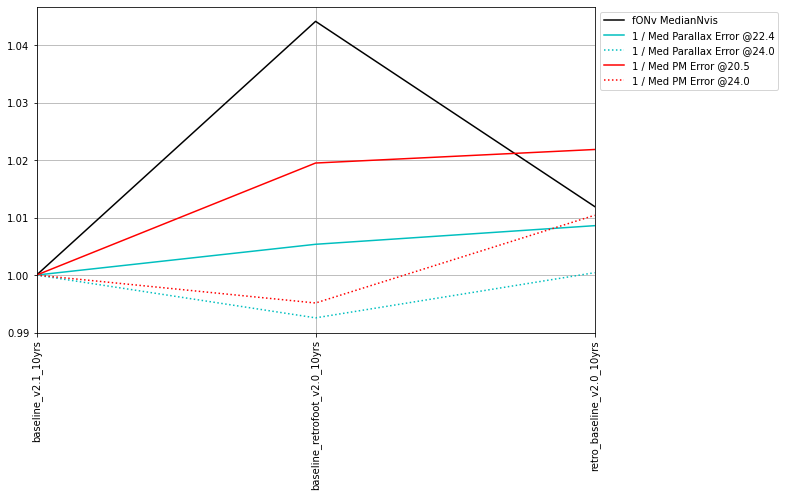

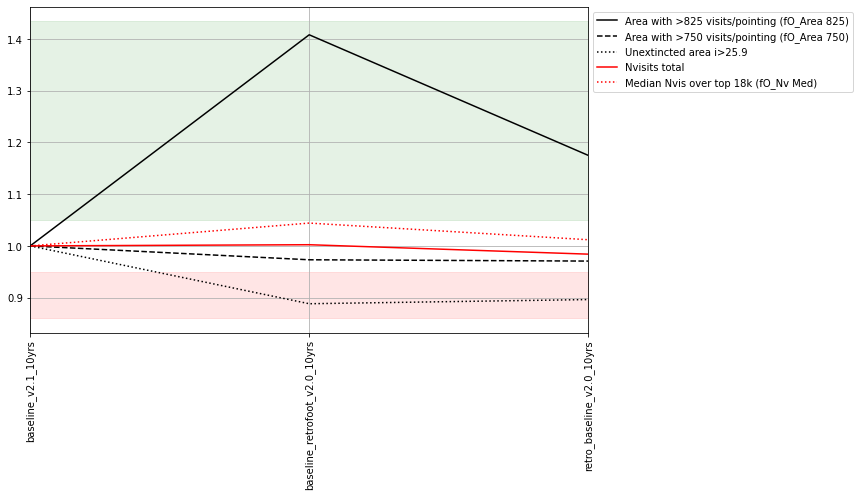

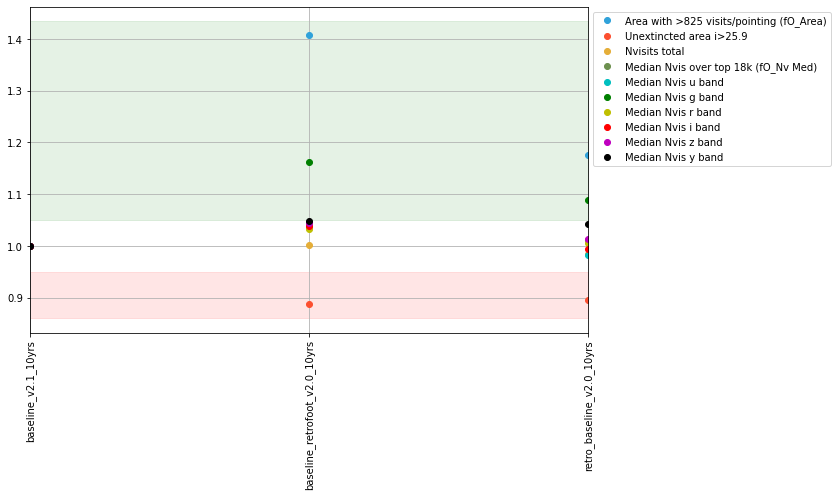

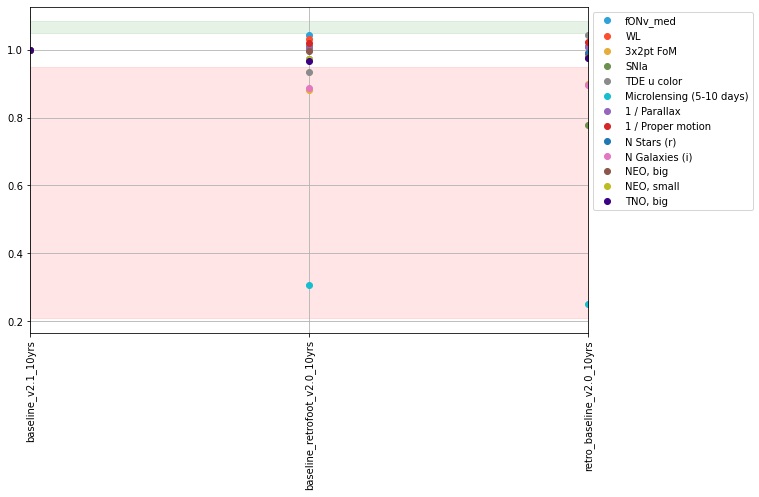

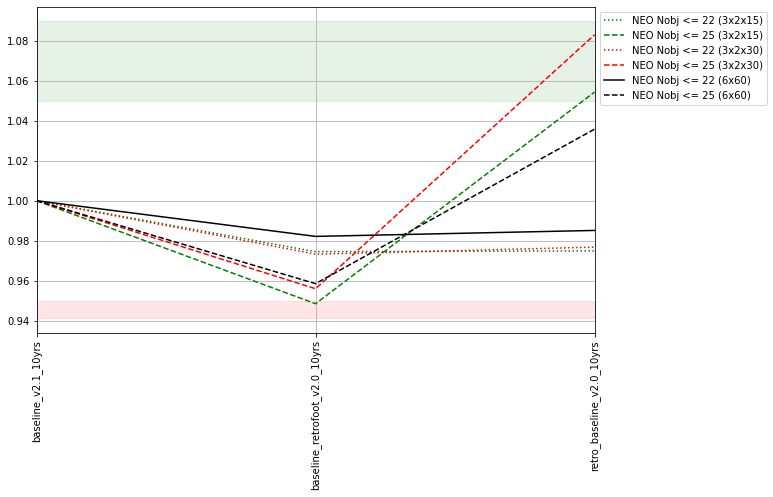

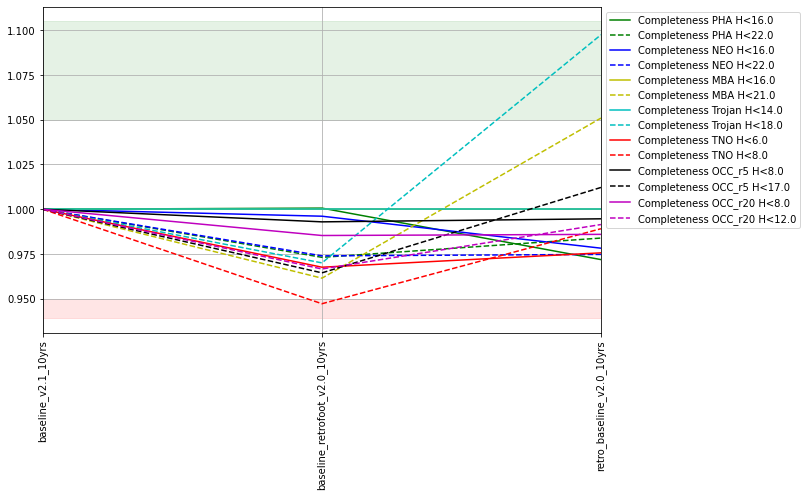

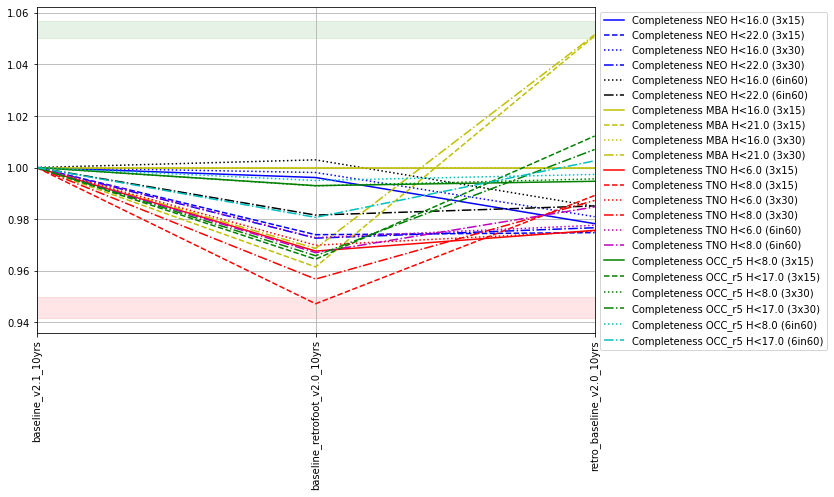

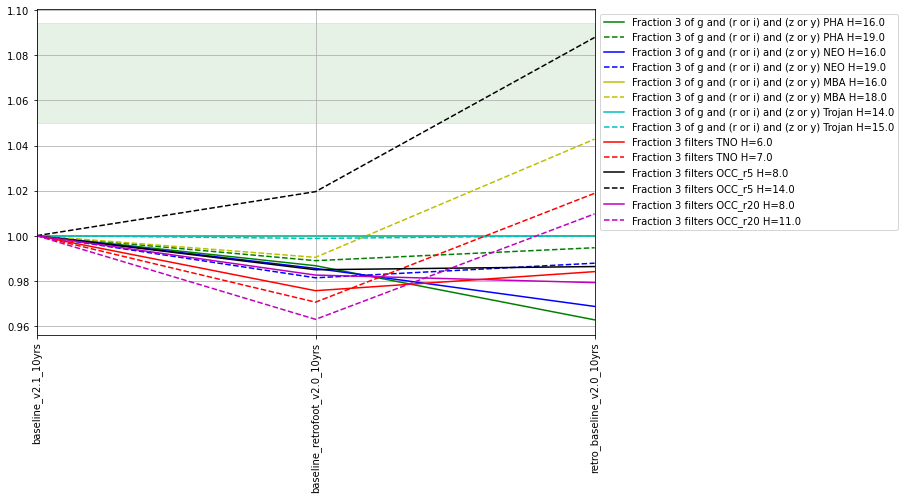

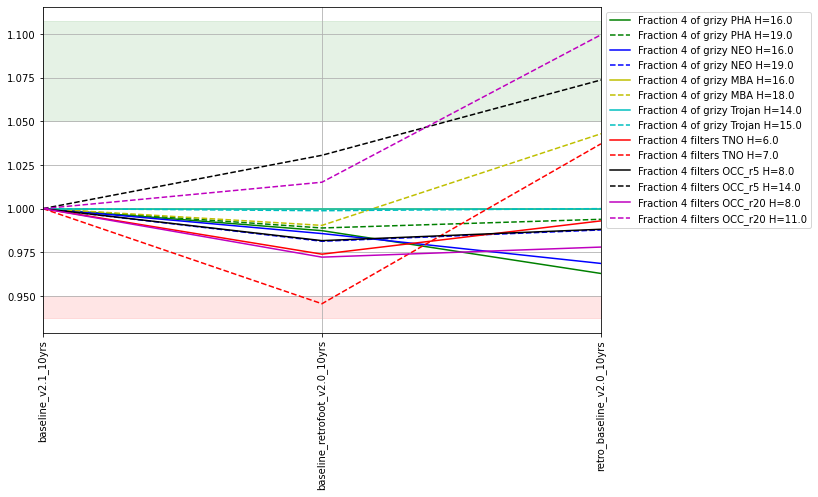

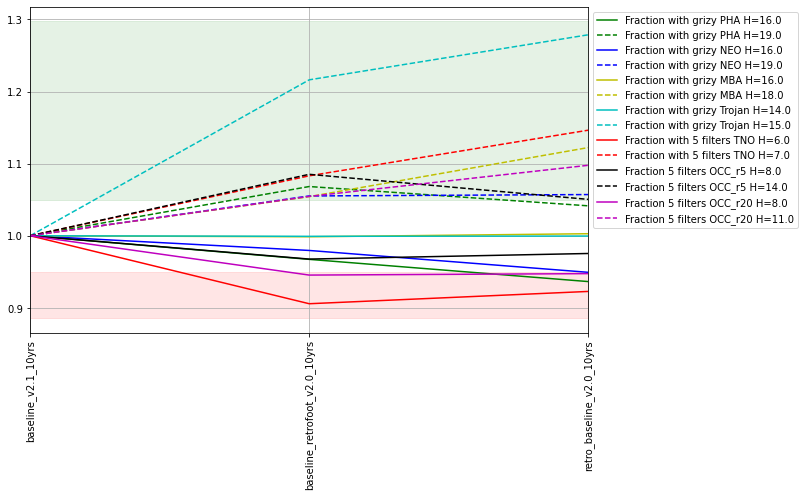

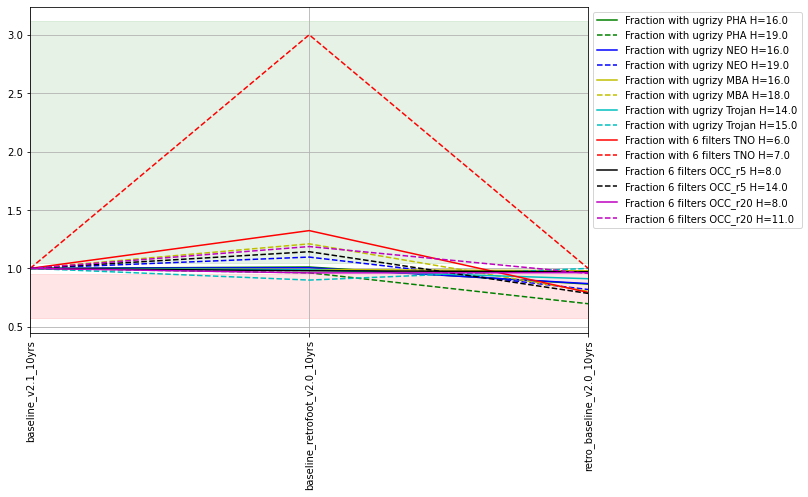

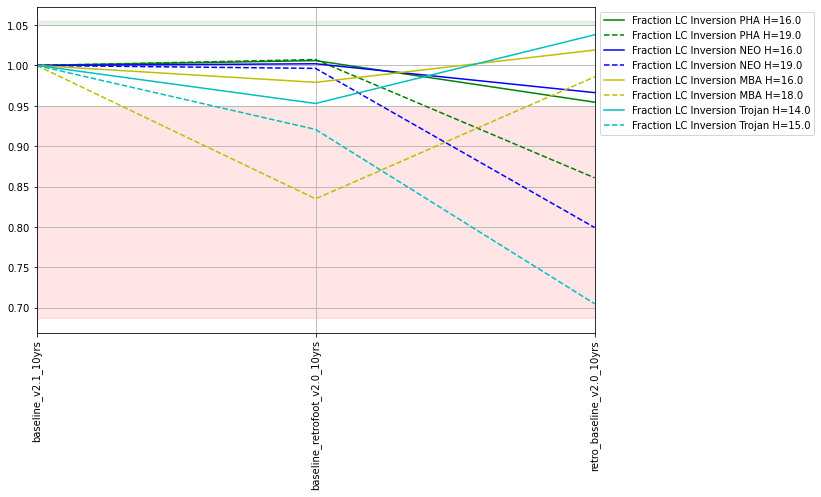

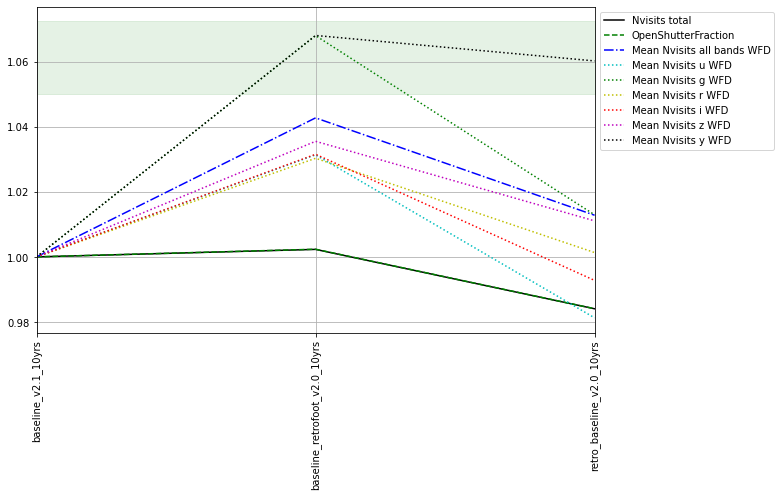

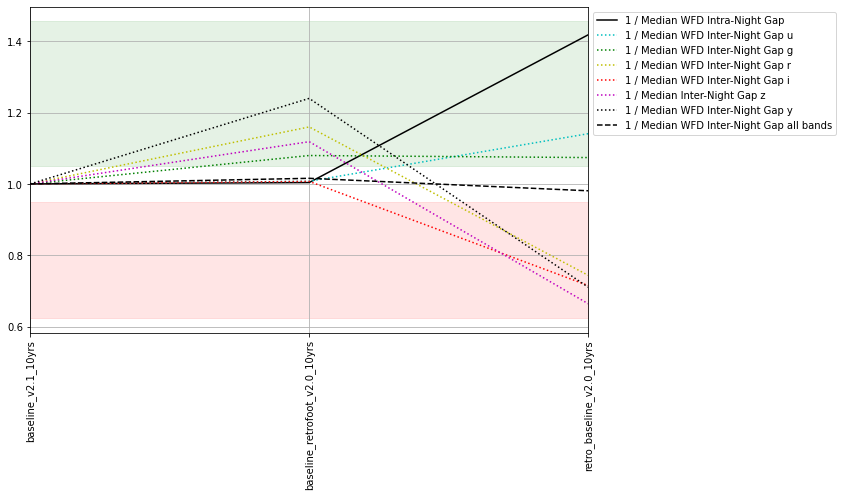

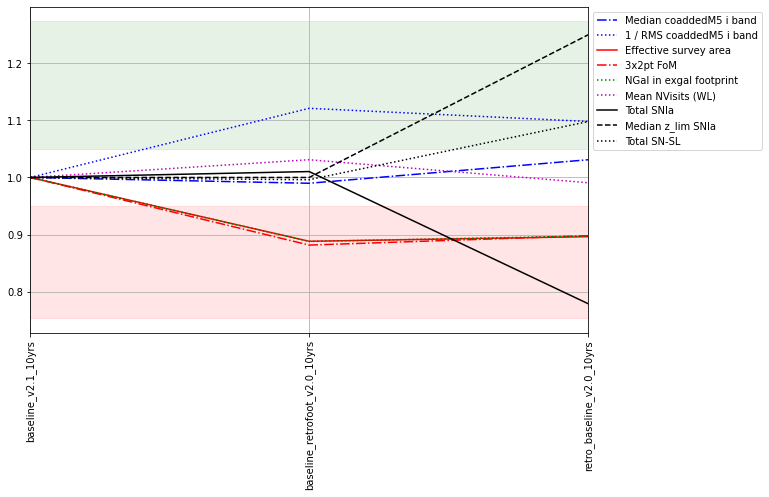

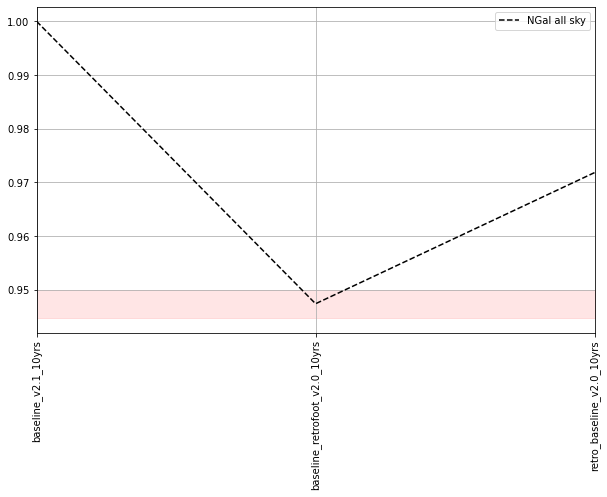

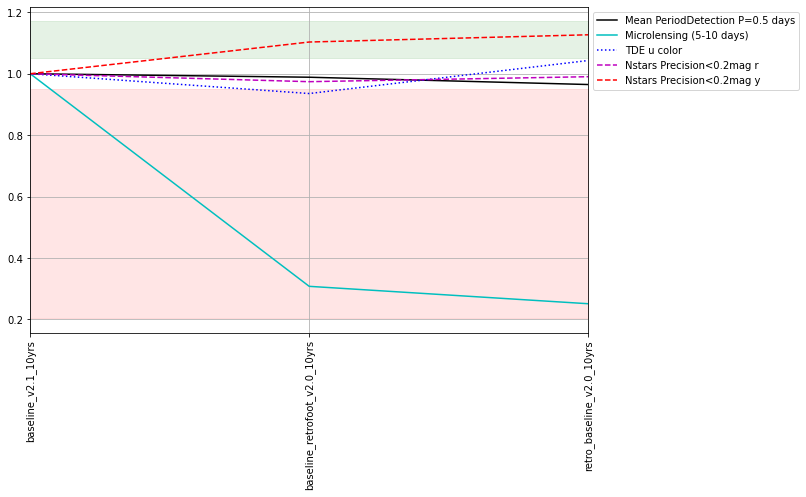

In [8]:
for k in good:
    print(k)
    maf.plot_run_metric(summaries.loc[these_runs, metric_set.loc[k]['metric']],
                         baseline_run='baseline_v2.1_10yrs',
                         horizontal_quantity='run',
                         vertical_quantity='value',
                         metric_set=metric_set.loc[k],
                        metric_label_map=metric_set.loc[k]['short_name']
                        )

In [32]:
# Now start adding new metrics 
microlensing_detect = [m for m in summaries if 'Microlensing' in m and 'Total detected' in m and 'footprint' not in m]
microlensing_detect_short = [m.replace(' MicrolensingMetric_detect', '').rstrip(' UserPointsSlicer') for m in microlensing_detect]
 
microlensing_npts = [m for m in summaries if 'Microlensing' in m and 'pts' in m and 'Fraction' in m]
microlensing_npts_short = [m.replace(' MicrolensingMetric_Npts', '').strip(' UserPointsSlicer') for m in microlensing_npts]

microlensing_fisher = [m for m in summaries if 'Microlensing' in m and 'Fisher' in m and 'Fraction' in m]
microlensing_fisher_short = [m.replace(' MicrolensingMetric_Fisher', '').strip(' UserPointsSlicer') for m in microlensing_fisher]

styles = ([c+'--' for c in ['c', 'g', 'y', 'r', 'm', 'b', 'k', 'b', 'k']] +
           [c+':' for c in ['c', 'g', 'y', 'r', 'm', 'b', 'k', 'b', 'k']] + 
          [c+'-.' for c in ['c', 'g', 'y', 'r', 'm', 'b', 'k', 'b', 'k']])

microlensing = maf.create_metric_set_df('microlensing', metrics=microlensing_detect + microlensing_npts + microlensing_fisher,
                        short_name=microlensing_detect_short + microlensing_npts_short + microlensing_fisher_short,
                              style=styles)

In [78]:
microlensing

metric  \
metric set   metric                                                                                                  
microlensing Total detected MicrolensingMetric_detect tE 1_5...  Total detected MicrolensingMetric_detect tE 1_...   
             Total detected MicrolensingMetric_detect tE 5_1...  Total detected MicrolensingMetric_detect tE 5_...   
             Total detected MicrolensingMetric_detect tE 10_...  Total detected MicrolensingMetric_detect tE 10...   
             Total detected MicrolensingMetric_detect tE 20_...  Total detected MicrolensingMetric_detect tE 20...   
             Total detected MicrolensingMetric_detect tE 30_...  Total detected MicrolensingMetric_detect tE 30...   
             Total detected MicrolensingMetric_detect tE 60_...  Total detected MicrolensingMetric_detect tE 60...   
             Total detected MicrolensingMetric_detect tE 100...  Total detected MicrolensingMetric_detect tE 10...   
             Total detected MicrolensingMetric_detect tE 200...  Total detected MicrolensingMetric_detect tE 20...   
             Total detected MicrolensingMetric_detect tE 500...  Total detected MicrolensingMetric_detect tE 50...   
             Fraction w/ at least 10 points MicrolensingMetr...  Fraction w/ at least 10 points MicrolensingMet...   
             Fraction w/ at least 10 points MicrolensingMetr...  Fraction w/ at least 10 points MicrolensingMet...   
             Fraction w/ at least 10 points MicrolensingMetr...  Fraction w/ at least 10 points MicrolensingMet...   
             Fraction w/ at least 10 points MicrolensingMetr...  Fraction w/ at least 10 points MicrolensingMet...   
             Fraction w/ at least 10 points MicrolensingMetr...  Fraction w/ at least 10 points MicrolensingMet...   
             Fraction w/ at least 10 points MicrolensingMetr...  Fraction w/ at least 10 points MicrolensingMet...   
             Fraction w/ at least 10 points MicrolensingMetr...  Fraction w/ at least 10 points MicrolensingMet...   
             Fraction w/ at least 10 points MicrolensingMetr...  Fraction w/ at least 10 points MicrolensingMet...   
             Fraction w/ at least 10 points MicrolensingMetr...  Fraction w/ at least 10 points MicrolensingMet...   
             Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   
             Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   
             Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   
             Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   
             Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   
             Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   
             Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   
             Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   
             Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetri...  Fraction w/ sigma_tE/tE < 0.1 MicrolensingMetr...   

                                                                                                     short_name  \
metric set   metric                                                                                               
microlensing Total detected MicrolensingMetric_detect tE 1_5...                       Total detected tE 1_5 day   
             Total detected MicrolensingMetric_detect tE 5_1...                      Total detected tE 5_10 day   
             Total detected MicrolensingMetric_detect tE 10_...                     Total detected tE 10_20 day   
             Total detected MicrolensingMetric_detect tE 20_...                     Total detected tE 20_30 da

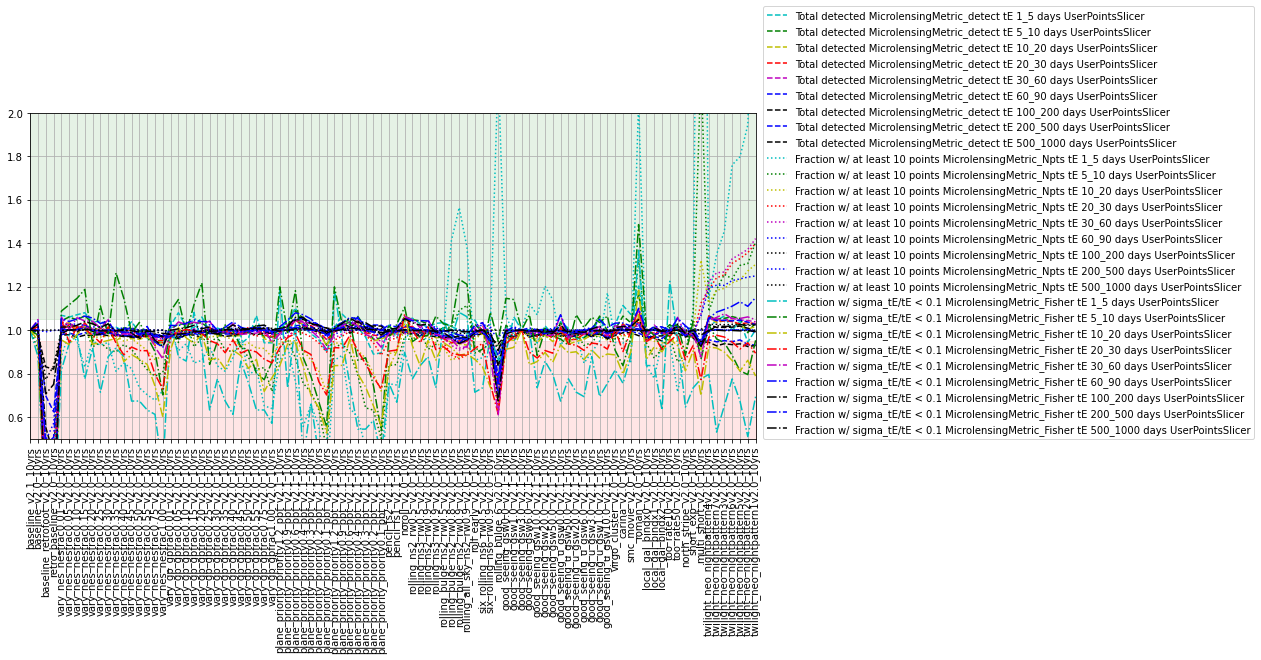

In [72]:
fams = [f for f in family_list if not f.startswith('ddf')]
fams = ['baseline', 'vary nes', 'vary gp', 'galactic plane footprint', 'rolling', 'good seeing', 'microsurveys']
these_runs = families.explode('run').loc[fams]['run']
fig, ax = maf.plot_run_metric(summaries.loc[these_runs, tmp.loc['microlensing']['metric']], 
                              baseline_run='baseline_v2.1_10yrs',
                              metric_set=tmp.loc['microlensing'],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(13)
ax.set_ylim(0.5, 2) #ax.set_xlim(0.5, 2)
lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')

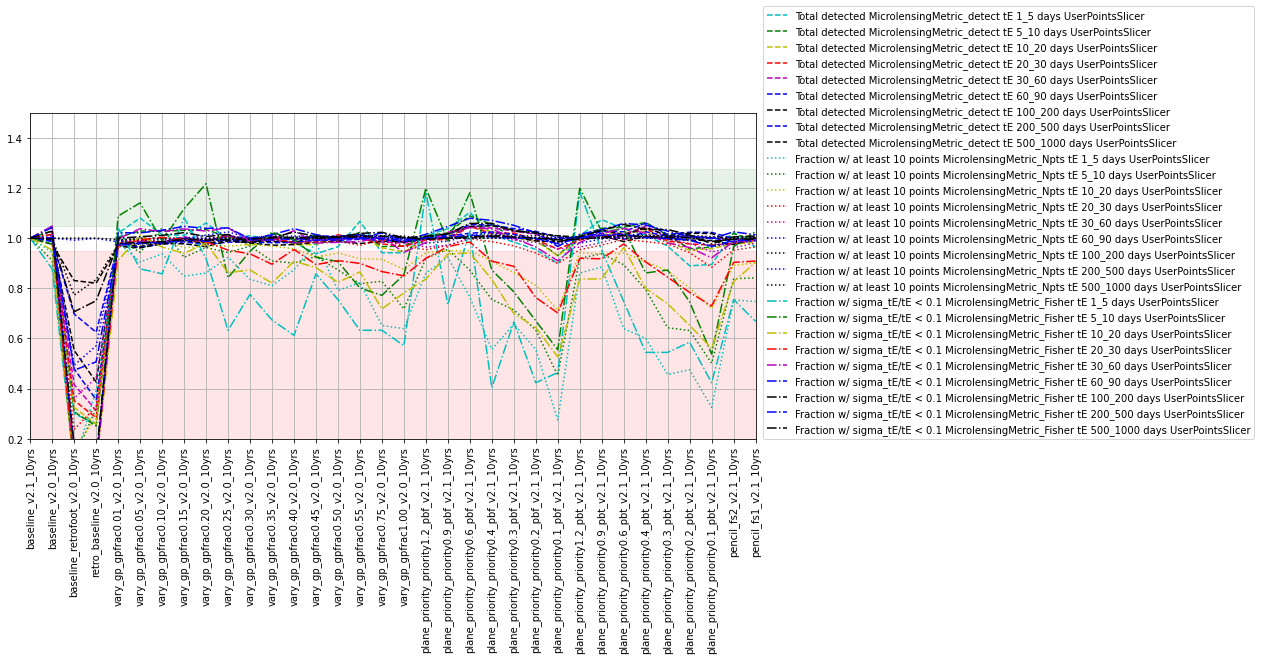

In [82]:
fams = [f for f in family_list if not f.startswith('ddf')]
fams = ['baseline', 'vary gp', 'galactic plane footprint',]
these_runs = families.explode('run').loc[fams]['run']
fig, ax = maf.plot_run_metric(summaries.loc[these_runs, tmp.loc['microlensing']['metric']], 
                              baseline_run='baseline_v2.1_10yrs',
                              metric_set=tmp.loc['microlensing'],
                             horizontal_quantity='run',
                             vertical_quantity='value')
fig.set_figwidth(13)
ax.set_ylim(0.2, 1.5) #ax.set_xlim(0.5, 2)
lgd = plt.legend(loc=(1.01, 0.0), fancybox=True, numpoints=1, fontsize='medium')

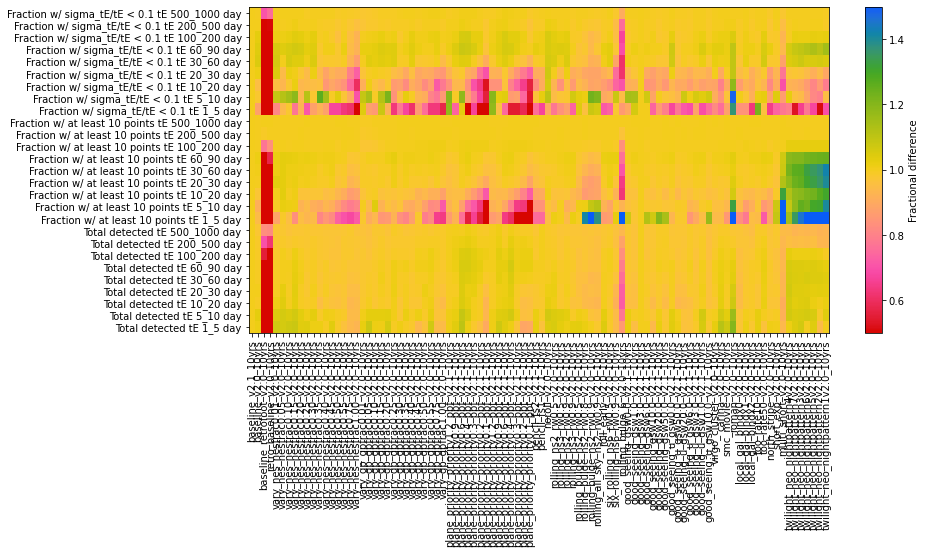

In [74]:
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, tmp.loc['microlensing']['metric']],
                             baseline_run='baseline_v2.1_10yrs', 
                                  metric_label_map=tmp.loc['microlensing']['short_name'],
                                  color_range=1,
                                  cmap=colorcet.cm['CET_R3_r'])
fig.set_figwidth(13)

In [52]:
# Add this new set back into the metric_sets
metric_set_new = pd.concat([metric_set, microlensing])

In [ ]:
# galactic plane metrics
# Footprint metrics -- the thing to compare is the sum of the various "Tau" reduce functions
# (the sum == weighted sum of the priority map .. larger value = more of the goal map observed)
# (most likely these just scale with Sum NObsPriority ...)


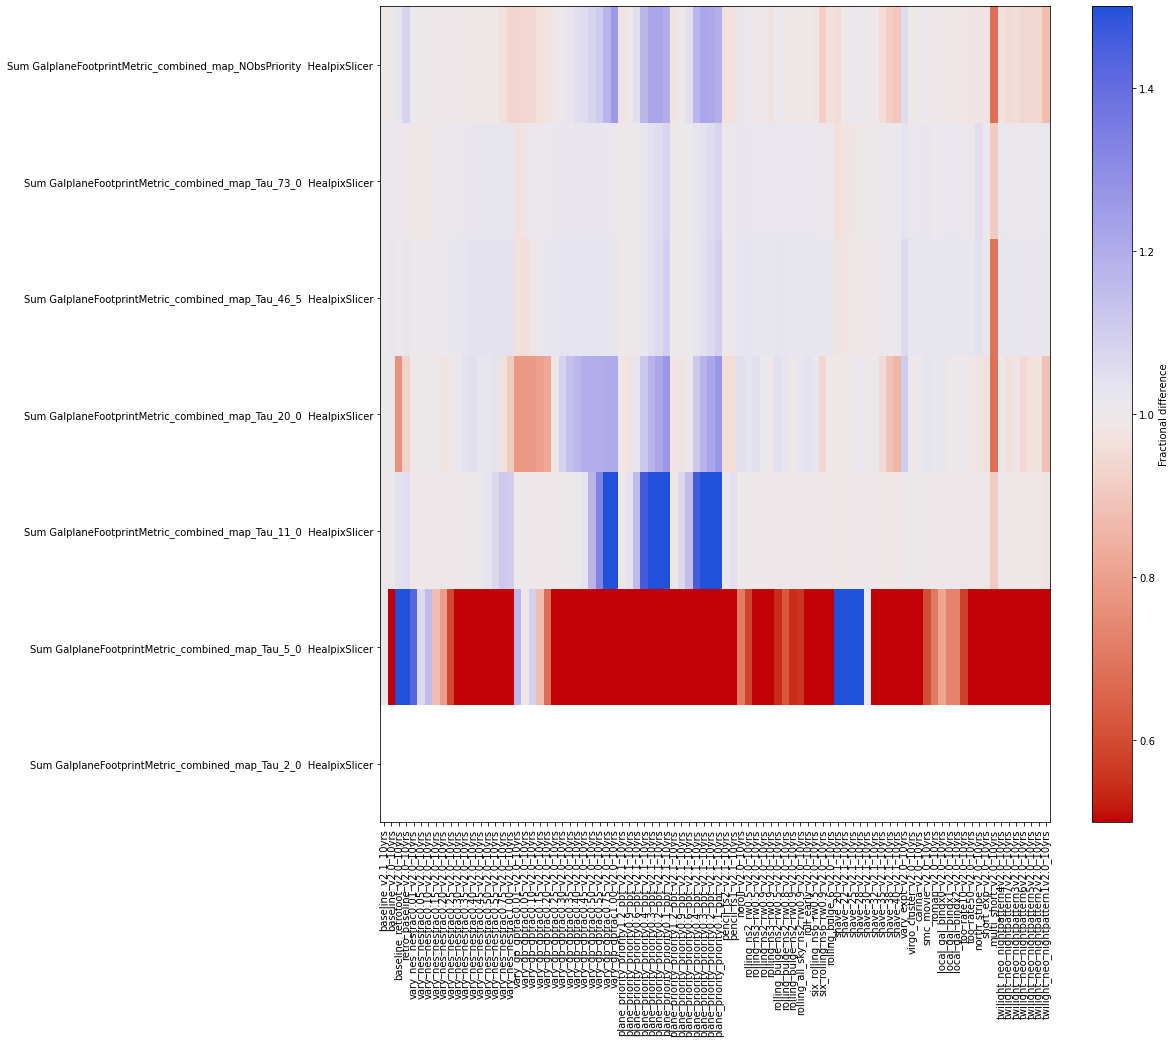

In [71]:
footprint_tau = [m for m in summaries if "Gal" in m and 'combined' in m 
                 and 'Sum' in m and 'Footprint' in m and "Tau" in m]
order = [float(t.split('Tau_')[-1].replace('_', '.').split(' ')[0]) for t in footprint_tau]
footprint_tau = [m for _, m in sorted(zip(order, footprint_tau))]
footprint_tau.append('Sum GalplaneFootprintMetric_combined_map_NObsPriority  HealpixSlicer')
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, footprint_tau], 
                                   baseline_run='baseline_v2.1_10yrs')
fig.set_figheight(15)
fig.set_figwidth(15)

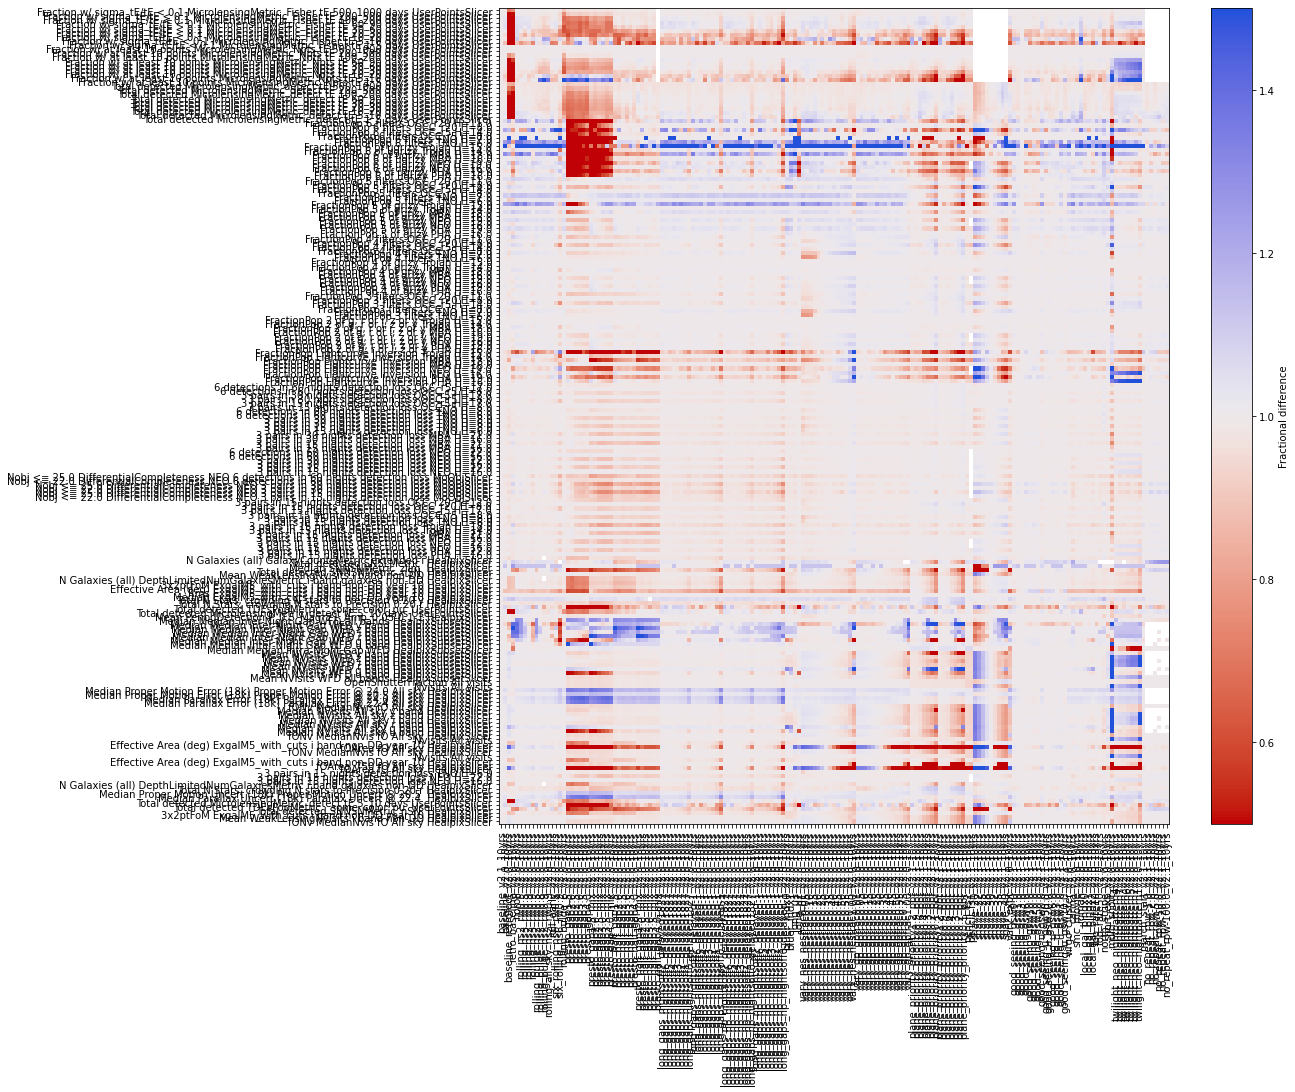

In [30]:
fams = [f for f in family_list if not f.startswith('ddf')]
these_runs = families.explode('run').loc[fams]['run']
fig, ax = maf.plot_run_metric_mesh(summaries.loc[these_runs, metric_set_new['metric']], 
                                   baseline_run='baseline_v2.1_10yrs',
                                  color_range=1)
fig.set_figheight(15)
fig.set_figwidth(15)